<a href="https://colab.research.google.com/github/aka-hombre/MAT422/blob/main/MAT422_HW2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import re
import random
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from IPython.display import display, Latex
from sympy import *
from collections import Counter
from scipy.stats import poisson,norm
from scipy.integrate import quad

#2.4.1 Maximum Likelihood Estimation

When we have data, we often want to characterize the main components of what makes are data unique. We first have to ditermine what distribution would best fit the data, then estimate our parameters. We want the parameters that maximize the likelihood of describing our data. If we think a normal distribution would best fit the data, we have to estimate $\mu$ and $\sigma$.

Lets generate some data, and do some MLE!



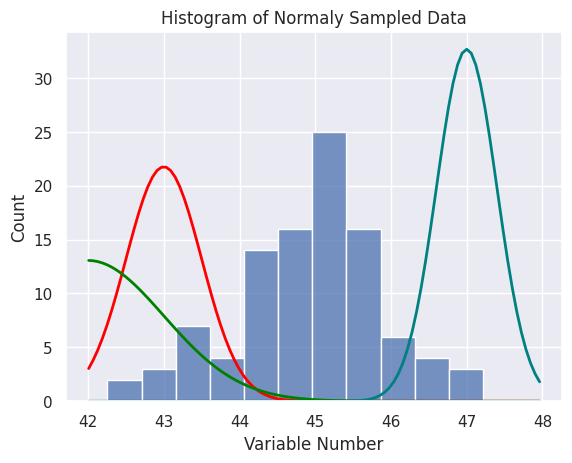

In [59]:
#Generate Random Data
np.random.seed(0)
mean = np.random.randint(1,50, size=2)
std = [[1, 0.5], [0.5, 1]]

sns.set_theme(style="darkgrid")
data = np.random.multivariate_normal(mean, std, 100)
plot = sns.histplot(x=data[:,0])


# Overlay normal distribution curves
x_values = np.linspace(plot.get_xlim()[0], plot.get_xlim()[1]+0.5, 100)


# Normal curves with chosen parameters
pdf1 = norm.pdf(x_values, 43, 0.5)
pdf2 = norm.pdf(x_values, 42, 1)
pdf3 = norm.pdf(x_values, 47, 0.4)

# Plot the normal curves
plt.plot(x_values, pdf1 * len(data[:, 0]) * (plot.get_xlim()[1] - plot.get_xlim()[0]) / 20, color='red', lw=2)
plt.plot(x_values, pdf2 * len(data[:, 0]) * (plot.get_xlim()[1] - plot.get_xlim()[0]) / 20, color='green', lw=2)
plt.plot(x_values, pdf3 * len(data[:, 0]) * (plot.get_xlim()[1] - plot.get_xlim()[0]) / 20, color='teal', lw=2)

plot.set_xlabel("Variable Number");
plt.title("Histogram of Normaly Sampled Data");
plt.show()

Here we Just plotted three arbitrary normal curves, but we need to find the correct estimations of the mean and standard deviation. Recall our log likelihood function is:
\begin{equation}
\ln \left[ f(x_1, \dots, x_n; \mu, \sigma^2) \right] = -\frac{n}{2} \ln(2 \pi \sigma^2) - \frac{1}{2 \sigma^2} \sum (x_i - \mu)^2
\end{equation}
Taking to the partial derivatives with respect to $\mu$ and $\sigma$ give us:
\begin{equation}
\mu = \frac{1}{n} \sum x_i
\end{equation}
and
\begin{equation}
\sigma^2 = \frac{\sum (x_i - \mu)^2}{n}
\end{equation}

In [61]:
print("Mean: "+str(np.mean(data[:,0])))
print("Standard Deviation: "+str(np.std(data[:,0])))

Mean: 44.92363258112121
Standard Deviation: 0.963009857703789


Let's see how to compare to the original:

In [66]:
np.random.seed(0)
mean = np.random.randint(1,50, size=2)
std = [[1, 0.5], [0.5, 1]]
print("Random generated Mean: "+str(mean[0]))
print("Random Generated STD: "+str(std[0][1]))

Random generated Mean: 45
Random Generated STD: 0.5


As we see it's close!

#2.4.2 Linear Regression

We will take our normally sampled data from before, and get the Linear Regression Line from the probability point of view.



Slope (m): 0.4702576586312316
Intercept (b): 26.793725867782754


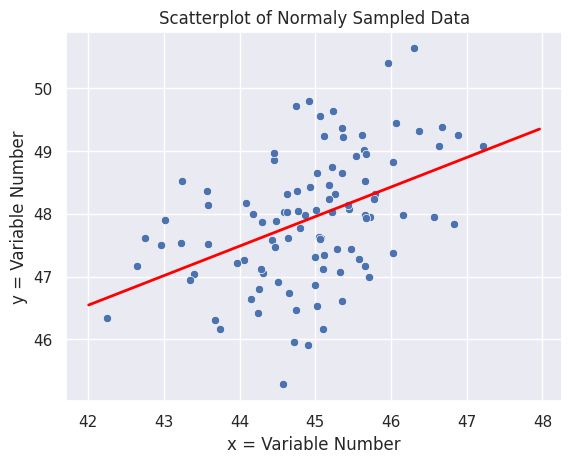

In [121]:
x, y = data[:, 0], data[:, 1]


# Calculate mean of x and y
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate m
m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)

# Calculate b
b = y_mean - m * x_mean

print("Slope (m):", m)
print("Intercept (b):", b)

plot = sns.scatterplot(x=x, y=y)
plot.set_xlabel("x = Variable Number");
plot.set_ylabel("y = Variable Number");
plt.title("Scatterplot of Normaly Sampled Data");
plt.plot(x_values, m * x_values + b, color='red', lw=2)
plt.show()
